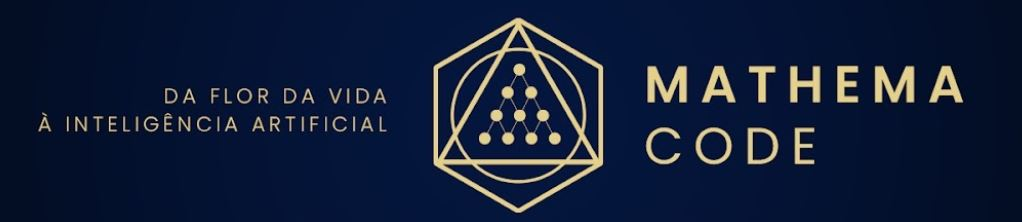

# Como criar um arquivo Colab:

   

*   Podemos acessar via: https://colab.research.google.com; ou 
*   Podemos acessar via **Google Drive**, conforme a imagem abaixo:

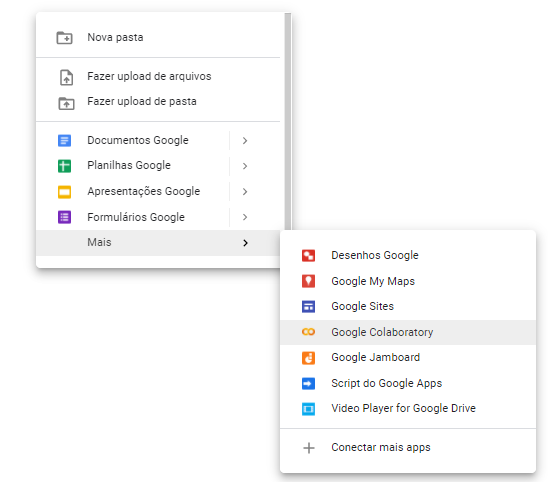

O Colab conecta o seu notebook na nuvem do Google, isso significa que você pode rodar o Python sem precisar configurar nada em sua máquina. (e isso é muito bom, pois não precisamos nos preocupar com instalações na máquina local).


# Criando célula no Colab

- texto
- imagem
- link
- código
- vídeo 


In [ ]:
from IPython.display import IFrame

link_youtube = 'https://www.youtube.com/embed/3EMGhQIm-HY'

IFrame(link_youtube, width=560, height=315, showinfo=1, frameborder="0", allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture", allowfullscreen=True)

# Introdução ao Python

- número inteiro
- número decimal 
- texto
- tipos de dados

In [ ]:
# int


In [ ]:
# float


In [ ]:
# string


In [ ]:
# cálculo


In [ ]:
# concatenar texto


In [ ]:
# tipo de dados


str

# Importando biblioteca

O nome **Pandas** vem da combinação de Panel Data e Python Data Analysis.

E possui uma excelente documentação:
https://pandas.pydata.org/pandas-docs/stable/index.html


In [11]:
import pandas as pd

In [12]:
# formatando os valores float
pd.options.display.float_format = '{:,.2f}'.format

# Etapas do desenvolvimento das analises

## Carregando os dados

**Fonte:**
http://www.transparencia.sp.gov.br/buscaRemunera.html

In [13]:
# Biblioteca que faz chamada para o Google Drive
from google.colab import drive

# Isso solicitará autorização com a sua conta do Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# caminho dos arquivos no Drive
caminhoJan = 'https://github.com/mathema-code/benford/blob/main/datasets/remuneracao_Jan2021.zip?raw=true'
caminhoFev = 'https://github.com/mathema-code/benford/blob/main/datasets/remuneracao_fev2021.zip?raw=true'
caminhoMar = 'https://github.com/mathema-code/benford/blob/main/datasets/remuneracao_Mar2021.zip?raw=true'

In [10]:
# carregando os dados de janeiro
caminhoJan.

SyntaxError: ignored

In [ ]:
# carregando os dados de fevereiro


In [ ]:
# carregando os dados de marco


Os arquivos Comma-separated values, também conhecido como CSV, são arquivos de texto de formato regulamentado pelo RFC 4180, que faz uma ordenação de bytes ou um formato de terminador de linha, separando valores com vírgulas.

**fonte:** https://pt.wikipedia.org/wiki/Comma-separated_values

In [14]:
# abrindo o arquivo csv
with open('remuneracao_fev2021.csv', 'r') as arq:
  print(arq.readline())
  print(arq.readline())

FileNotFoundError: ignored

## Carregando todos os arquivos de uma unica vez

In [15]:
# criando um dataframe do zero
fopag = pd.DataFrame()

# percorrendo os arquivos
for f in [caminhoJan, caminhoFev, caminhoMar]:
    # lendo os arquivos CSV
    appenddados = pd.read_csv(f, sep=";", decimal=',', encoding='latin-1', compression='zip')
    
    # criando um unico arquivo
    fopag = fopag.append(appenddados,ignore_index=True)
fopag

,NOME,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$),ORGÃO,SITUAÃÃO,REMUNERAÃÃO DO MÃS,FÃRIAS E 13Âº SALÃRIO,LICENÃA PRÃMIO INDENIZADA,ABONO PERMANÃNCIA & OUTRAS INDENIZAÃÃES,TOTAL LIQUÃDO (R$)
0,AAIRON TELES DE CAMARGO,OFICIAL ADMINISTRATIVO,DETRAN,ATIVOS,"2,601.32",0.00,0.00,0.00,125.52,0.00,"1,362.79",NaN,NaN,nan,nan,nan,nan,nan
1,AALAN DA SILVA ARAUJO,SD 1C PM,PMSP,ATIVOS,"3,667.57",0.00,0.00,0.00,828.30,0.00,"2,706.14",NaN,NaN,nan,nan,nan,nan,nan
2,AARAN ESTEVAO LIMA BARBOSA,CAP PM,PMSP,ATIVOS,"11,699.31",503.13,383.34,0.00,524.59,0.00,"7,557.77",NaN,NaN,nan,nan,nan,nan,nan
3,AARAO DE OLIVEIRA,MAJ PM,SPPREV,APOSENTADOS,"15,064.60",0.00,273.95,0.00,0.00,0.00,"13,531.40",NaN,NaN,nan,nan,nan,nan,nan
4,AARON DOUGLAS OLIVEIRA,SD 1C PM,PMSP,ATIVOS,"4,255.51",0.00,0.00,0.00,828.30,0.00,"4,078.50",NaN,NaN,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224669,ZUZIMEIRE TOSTES DA SILVA,AGENTE DE SERVICOS ESCOLARES,NaN,NaN,nan,nan,0.00,nan,nan,0.00,nan,SAO PAULO PREVIDENCIA - SPPREV,NaN,"2,060.64",0.00,0.00,0.00,"1,629.22"
3224670,ZUZU DE OLIVEIRA,BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,NaN,NaN,nan,nan,0.00,nan,nan,0.00,nan,SAO PAULO PREVIDENCIA - SPPREV,NaN,"2,642.94",0.00,0.00,0.00,"2,370.54"
3224671,ZVONIMIRO VARVELLO PESUT,CHEFE I,NaN,NaN,nan,nan,0.00,nan,nan,0.00,nan,SAO PAULO PREVIDENCIA - SPPREV,NaN,"2,465.13",0.00,0.00,0.00,"2,174.96"
3224672,ZYAD ARI MUSTAFA NEGREIROS,BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,NaN,NaN,nan,nan,0.00,nan,nan,0.00,nan,SAO PAULO PREVIDENCIA - SPPREV,NaN,977.07,0.00,0.00,0.00,889.08


## Informações dos dados

In [20]:
# dimesão dos dados
#dic_fev  = caminhoFev[['NOME', 'SITUAÇÃO']].set_index('NOME')['SITUAÇÃO'].to_dict()


In [ ]:
# informacoes dados


# Quais os valores totais pagos por rubrica?

In [ ]:
# utilizando a função sum


# Qual a distribuicao dos funcionarios por situacao?

## Solução com Procv / Vloockup

In [ ]:
# criando filtro de marco


In [ ]:
# criando um dicionario com as informacoes da situacao de fevereiro


In [ ]:
# aplicando o filtro com o dicionario usando o map


In [ ]:
# verificando os valores

fopag['SITUAÇÃO'].value_counts()

In [21]:
# preenchendo os dados NaN por ativos
fopag['SITUAÇÃO'].fillna('Observar', inplace=True)

# Qual o total liquido pago por Orgão e Cargo?

In [22]:
# utilizando a função groupby 'TOTAL LIQUÍDO (R$)'
fopag.groupby(['ORGÃO', 'CARGO'])['TOTAL LIQUÍDO (R$)'].sum()

ORGÃO      CARGO                                  
ADM GERAL  BENEFICIARIO DA POLICIA MILITAR - CBPM      164,373.89
           BENEFICIARIOS-PENSAO PARLAMENTAR          1,209,565.04
           COMPL.APOSENTADORIA - FERROBAN (FEPASA)      67,456.83
           COMPL.PENSAO - FERROBAN (FEPASA)              4,270.45
           COMPLEM APOSENT - BANCO NOSSA CAIXA         154,633.98
                                                         ...     
ZOOLOGICO  SERVENTE DE MANUTENCAO/OBRAS                  1,938.89
           TECNICO DE LABORATORIO                        3,328.70
           TECNICO DE SEG.DO TRABALHO                      761.80
           TRATADOR DE ANIMAIS                          39,964.32
           VIGILANTE                                    37,585.27
Name: TOTAL LIQUÍDO (R$), Length: 4716, dtype: float64

# Quais valor pago para o orgão ADM GERAL de sálario?

In [29]:
# criando um filtro com a informação da 'ADM GERAL'
filtro = fopag['ORGÃO'] == 'ADM GERAL'
filtro

0          False
1          False
2          False
3          False
4          False
           ...  
3224669    False
3224670    False
3224671    False
3224672    False
3224673    False
Name: ORGÃO, Length: 3224674, dtype: bool

In [32]:
# filtrando o dataframe 
adm_geral = fopag[filtro]

In [33]:
# dimensão dados
adm_geral.shape

(34285, 18)

In [35]:
# criando a tabela dinâmica com a função pivot table
pvt = adm_geral.pivot_table(index='CARGO', columns='SITUAÇÃO', values='TOTAL LIQUÍDO (R$)', aggfunc='sum')
pvt

SITUAÇÃO,APOSENTADOS,PENSIONISTAS
CARGO,,
BENEFICIARIO DA POLICIA MILITAR - CBPM,nan,"164,373.89"
BENEFICIARIOS-PENSAO PARLAMENTAR,nan,"1,209,565.04"
COMPL.APOSENTADORIA - FERROBAN (FEPASA),"67,456.83",nan
COMPL.PENSAO - FERROBAN (FEPASA),nan,"4,270.45"
COMPLEM APOSENT - BANCO NOSSA CAIXA,"154,633.98",nan
...,...,...
PENSAO ADMINISTRATIVA,nan,"619,928.74"
PENSAO AUXILIO ACIDENTE,nan,"5,181.38"
PENSAO JUDICIAL,nan,"152,796.90"


# Mapa de Calor

In [37]:
# biblioteca seaborn
import seaborn as sns

In [44]:
# paleta de cor
paleta_cor = sns.light_palette('blue', as_cmap=True)

In [45]:
# cores gradientes
pvt.style.background_gradient(cmap=paleta_cor).set_precision(2)

SITUAÇÃO,APOSENTADOS,PENSIONISTAS
CARGO,,
BENEFICIARIO DA POLICIA MILITAR - CBPM,nan,164373.89
BENEFICIARIOS-PENSAO PARLAMENTAR,nan,1209565.04
COMPL.APOSENTADORIA - FERROBAN (FEPASA),67456.83,nan
COMPL.PENSAO - FERROBAN (FEPASA),nan,4270.45
COMPLEM APOSENT - BANCO NOSSA CAIXA,154633.98,nan
COMPLEM PENSAO - BANCO NOSSA CAIXA,nan,2975738.80
COMPLEM PENSAO-BANCO NOSSA CAIXA,514078.95,nan
COMPLEM. APOSENT- FUNDACAO ZOOLOGICO SAO,16400.90,nan
COMPLEM. APOSENT- SEADE,1112.70,nan


# Estatística Descritiva

In [50]:
# utilizando a função describe
estatistica = adm_geral.describe().T
estatistica

,count,mean,std,min,25%,50%,75%,max
REMUNERAÇÃO DO MÊS,"34,285.00","6,225.86","5,415.05",0.00,"2,750.00","4,632.32","7,729.93","62,905.12"
FÉRIAS E 13º SALÁRIO,"34,285.00",200.73,931.49,"-1,108.01",0.00,0.00,0.00,"23,610.82"
PAGAMENTOS EVENTUAIS,"34,285.00",59.20,"2,072.05","-71,891.41",0.00,0.00,0.00,"171,541.46"
LICENÇA PRÊMIO INDENIZADA,"34,285.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,"34,285.00",0.04,1.46,0.00,0.00,0.00,0.00,51.27
REDUTOR SALARIAL,"34,285.00",-121.41,"1,278.21","-39,856.53",0.00,0.00,0.00,0.00
TOTAL LIQUÍDO (R$),"34,285.00","3,791.41","3,959.27","-63,790.50","1,118.40","2,593.08","5,322.51","109,682.82"
REMUNERAÃÃO DO MÃS,0.00,nan,nan,nan,nan,nan,nan,nan
FÃRIAS E 13Âº SALÃRIO,0.00,nan,nan,nan,nan,nan,nan,nan
LICENÃA PRÃMIO INDENIZADA,0.00,nan,nan,nan,nan,nan,nan,nan


In [52]:
# sytle bar cor '#d65f5f', '#5fba7d'
estatistica.style.bar(subset=['min','max'], align='mid', color=['#d65f5f', '#5fba7d'])

,count,mean,std,min,25%,50%,75%,max
REMUNERAÇÃO DO MÊS,34285.000000,6225.862541,5415.047584,0.000000,2750.000000,4632.320000,7729.930000,62905.120000
FÉRIAS E 13º SALÁRIO,34285.000000,200.732989,931.494489,-1108.010000,0.000000,0.000000,0.000000,23610.820000
PAGAMENTOS EVENTUAIS,34285.000000,59.197826,2072.053753,-71891.410000,0.000000,0.000000,0.000000,171541.460000
LICENÇA PRÊMIO INDENIZADA,34285.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,34285.000000,0.041871,1.464600,0.000000,0.000000,0.000000,0.000000,51.270000
REDUTOR SALARIAL,34285.000000,-121.408193,1278.214126,-39856.530000,0.000000,0.000000,0.000000,0.000000
TOTAL LIQUÍDO (R$),34285.000000,3791.413604,3959.273072,-63790.500000,1118.400000,2593.080000,5322.510000,109682.820000
REMUNERAÃÃO DO MÃS,0.000000,nan,nan,nan,nan,nan,nan,nan
FÃRIAS E 13Âº SALÃRIO,0.000000,nan,nan,nan,nan,nan,nan,nan
LICENÃA PRÃMIO INDENIZADA,0.000000,nan,nan,nan,nan,nan,nan,nan


# Salvando a análise para um arquivo Excel

In [53]:
# utilizando a função to_excel
estatistica.to_excel('estatistica.xlsx')

# Referência:
https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

http://www.transparencia.sp.gov.br/buscaRemunera.html

https://color.adobe.com/pt/create/color-wheel

https://docs.python.org/3/library/glob.html